In [ ]:
%matplotlib inline 
import numpy as np
import math
import matplotlib.pyplot as plt
#from scipy.stats import norm

N = 10
X = np.linspace(0, 1, N)
T = [math.sin(2*math.pi*x) + np.random.normal(loc=0, scale=0.1) for x in X]

print(X)
print(T)
plt.scatter(X, T)

X_ref = np.linspace(0, 1, 1000)
T_ref = [math.sin(2*math.pi*x) for x in X_ref]
T_ref_noise = [t + np.random.normal(loc=0, scale=0.2) for t in T_ref]

plt.plot(X_ref, T_ref, c='g')

In [98]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=9)
X = X.reshape(len(X), 1)
X_poly = poly_reg.fit_transform(X)
X_poly

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.11111111e-01, 1.23456790e-02, 1.37174211e-03,
        1.52415790e-04, 1.69350878e-05, 1.88167642e-06, 2.09075158e-07,
        2.32305731e-08, 2.58117479e-09],
       [1.00000000e+00, 2.22222222e-01, 4.93827160e-02, 1.09739369e-02,
        2.43865264e-03, 5.41922810e-04, 1.20427291e-04, 2.67616202e-05,
        5.94702672e-06, 1.32156149e-06],
       [1.00000000e+00, 3.33333333e-01, 1.11111111e-01, 3.70370370e-02,
        1.23456790e-02, 4.11522634e-03, 1.37174211e-03, 4.57247371e-04,
        1.52415790e-04, 5.08052634e-05],
       [1.00000000e+00, 4.44444444e-01, 1.97530864e-01, 8.77914952e-02,
        3.90184423e-02, 1.73415299e-02, 7.70734663e-03, 3.42548739e-03,
        1.52243884e-03, 6.76639485e-04],
       [1.00000000e+00, 5.55555556e-01, 3.08641975e-01, 1.71467764e-01,
   

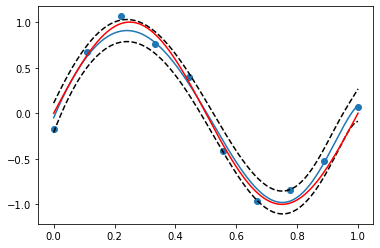

In [105]:
alpha = 5 * 0.001
beta = 11.1
I = np.eye(X_poly.shape[1])
S_inv = alpha * I
for fai_xn in X_poly:
    S_inv += beta*fai_xn.reshape(len(fai_xn), 1).dot(fai_xn.reshape(len(fai_xn), 1).transpose())
    
S_inv
S = np.linalg.inv(S_inv)
S

sum_fai_t = np.zeros(X_poly.shape[1])
for fai_n, t_n in zip(X_poly, T):
    sum_fai_t += fai_n * t_n
    
sum_fai_t

S_sum_fai_t = S.dot(sum_fai_t)

poly_reg = PolynomialFeatures(degree=9)
X_ref = X_ref.reshape(len(X_ref), 1)
X_ref_poly =  poly_reg.fit_transform(X_ref)
X_ref_poly
m_xs = []
s2xs_upper = []
s2xs_lower = []
for x_ref_poly in X_ref_poly:
    m_x = beta*x_ref_poly.dot(S_sum_fai_t)
    s2x = (1.0/beta) + x_ref_poly.dot(S.dot(x_ref_poly))
    m_xs.append(m_x)
    s2xs_upper.append(m_x + s2x)
    s2xs_lower.append(m_x - s2x)
plt.plot(X_ref, m_xs)
plt.plot(X_ref, s2xs_upper, c='black', linestyle='--')
plt.plot(X_ref, s2xs_lower, c='black', linestyle='--')
plt.plot(X_ref, T_ref, c = 'red')
plt.scatter(X, T)